In [67]:
import numpy as np
import os
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd

# Colab에서 실행하기

https://colab.research.google.com/github/SLCFLAB/FinTech2021/blob/main/ML_day3.ipynb

# Classification

### 이진 분류기 훈련

In [2]:
import tensorflow as tf

# Download the mnist dataset using keras
data_train, data_test = tf.keras.datasets.mnist.load_data()

# Parse images and labels
(images_train, labels_train) = data_train
(images_test, labels_test) = data_test

In [3]:
X_train, y_train = images_train.reshape(-1,28*28), labels_train
X_test, y_test = images_test.reshape(-1,28*28), labels_test
X_train.shape

(60000, 784)

In [4]:
y_train.shape

(60000,)

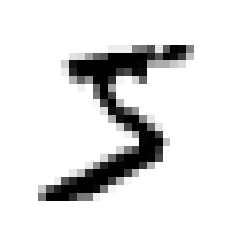

In [5]:
first_digit = X_train[0]
first_digit_image = first_digit.reshape(28, 28)
plt.imshow(first_digit_image, cmap=mpl.cm.binary)
plt.axis("off")
plt.show()

In [6]:
y_train = y_train.astype(np.uint8)
y_test = y_test.astype(np.uint8)

In [7]:
# For binary classification: 5 vs Not 5
y_train_5 = (y_train == 5)
y_test_5 = (y_test == 5)

In [8]:
y_train_5

array([ True, False, False, ...,  True, False, False])

In [9]:
X_train = X_train[:5000,:]
y_train_5 = y_train_5[:5000]

In [10]:
from sklearn.svm import SVC
svc = SVC()

svc.fit(X_train, y_train_5)
svc.predict([first_digit])

array([ True])

### 성능 측정

In [11]:
y_train_pred = svc.predict(X_train)

In [12]:
y_train_pred

array([ True, False, False, ..., False, False, False])

In [13]:
from sklearn.metrics import confusion_matrix

# Rows: represent true labels
# Columns: represent predicted labels
print("[True Negative,   False Positive]\n[False Negative,  True Positive]\n")
C = confusion_matrix(y_train_5, y_train_pred)
C

[True Negative,   False Positive]
[False Negative,  True Positive]



array([[4566,    0],
       [  19,  415]])

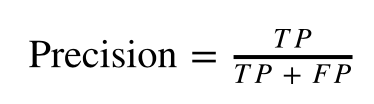

In [14]:
from sklearn.metrics import precision_score, recall_score

precision_score(y_train_5, y_train_pred)

1.0

In [15]:
# Precision = TP/(TP+FP)
C[1][1] / (C[0][1] + C[1][1])

1.0

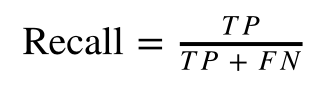

In [16]:
recall_score(y_train_5, y_train_pred)

0.956221198156682

In [17]:
# Recall = TP/(TP+FN)
C[1][1] / (C[1][0] + C[1][1])

0.956221198156682

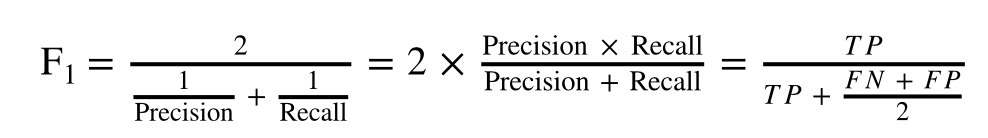

In [18]:
from sklearn.metrics import f1_score

f1_score(y_train_5, y_train_pred)

0.977620730270907

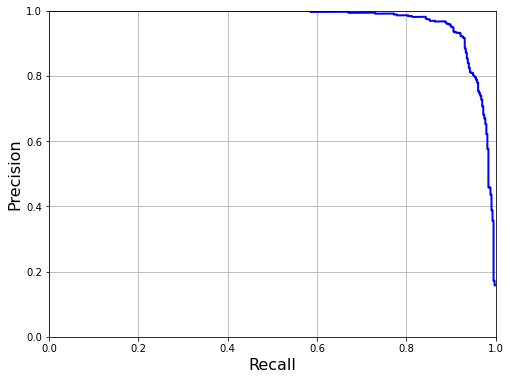

In [19]:
# precision, recall의 trade-off
from sklearn.metrics import precision_recall_curve
from sklearn.model_selection import cross_val_score, cross_val_predict

y_scores = cross_val_predict(svc, X_train, y_train_5, cv=3, method="decision_function")
precisions, recalls, thresholds = precision_recall_curve(y_train_5, y_scores)

def plot_precision_vs_recall(precisions, recalls):
    plt.plot(recalls, precisions, "b-", linewidth=2)
    plt.xlabel("Recall", fontsize=16)
    plt.ylabel("Precision", fontsize=16)
    plt.axis([0, 1, 0, 1])
    plt.grid(True)

plt.figure(figsize=(8, 6))
plot_precision_vs_recall(precisions, recalls)
plt.show()

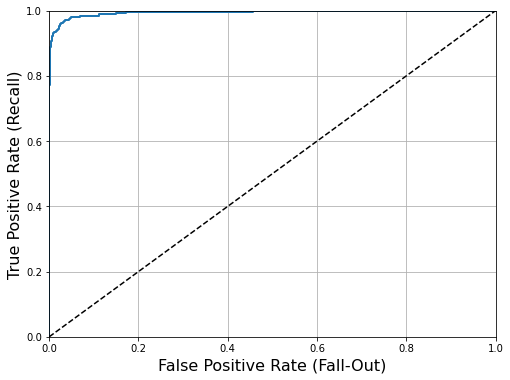

In [20]:
from sklearn.metrics import roc_curve

# TPR = recall
# FPR = FP/(FP+TN) = Fall-Out
fpr, tpr, thresholds = roc_curve(y_train_5, y_scores)

def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--') # dashed diagonal
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate (Fall-Out)', fontsize=16)
    plt.ylabel('True Positive Rate (Recall)', fontsize=16)
    plt.grid(True)

plt.figure(figsize=(8, 6))
plot_roc_curve(fpr, tpr)
plt.show()

In [21]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_train_5, y_scores)

0.9941387050348094

# Regression

In [50]:
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

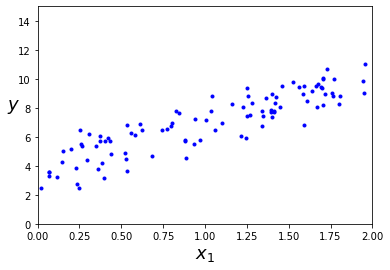

In [51]:
plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([0, 2, 0, 15])
plt.show()

In [52]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X, y)

LinearRegression()

In [53]:
lin_reg.intercept_, lin_reg.coef_

(array([3.69656047]), array([[3.22014791]]))

In [54]:
X_new = np.array([[0], [2]])


In [55]:
X_new

array([[0],
       [2]])

In [56]:
y_predict = lin_reg.predict(X_new)


In [57]:
y_predict

array([[ 3.69656047],
       [10.13685628]])

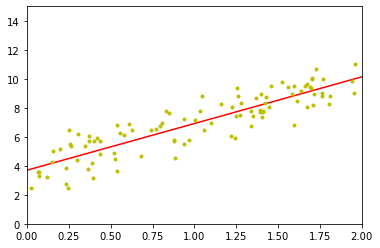

In [58]:
plt.plot(X_new, y_predict, "r-", label="linear")
plt.plot(X, y, "y.")
plt.axis([0, 2, 0, 15])
plt.show()

## Lasso

In [59]:
from sklearn.linear_model import Lasso

lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(X, y)

Lasso(alpha=0.1)

In [60]:
y_predict_lasso = lasso_reg.predict(X_new)

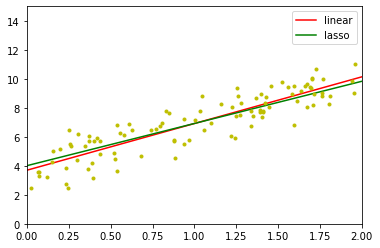

In [61]:
plt.plot(X_new, y_predict, "r-", label="linear")
plt.plot(X_new, y_predict_lasso, "g-", label="lasso")
plt.plot(X, y, "y.")
plt.axis([0, 2, 0, 15])
plt.legend()
plt.show()


## Ridge

In [62]:
from sklearn.linear_model import Ridge

ridge_reg = Ridge(alpha=1.0)
ridge_reg.fit(X, y)
y_predict_ridge = ridge_reg.predict(X_new)

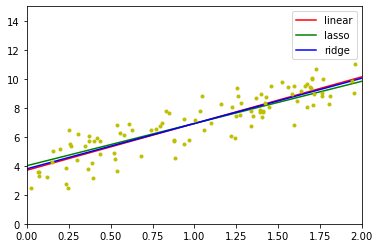

In [63]:
plt.plot(X_new, y_predict, "r-", label="linear")
plt.plot(X_new, y_predict_lasso, "g-", label="lasso")
plt.plot(X_new, y_predict_ridge, "b-", label="ridge")
plt.plot(X, y, "y.")
plt.axis([0, 2, 0, 15])
plt.legend()
plt.show()



## Multiple Linear Regression

In [68]:
housing = pd.read_csv("./housing.csv")
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [69]:
housing = housing[['median_income', 'total_rooms', 'median_house_value']]

In [70]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)

In [71]:
X_train, y_train = train_set[['median_income', 'total_rooms']], train_set['median_house_value']
X_train = np.array(X_train)
y_train = np.array(y_train)

In [72]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

LinearRegression()

In [73]:
X_test, y_test = test_set[['median_income', 'total_rooms']], test_set['median_house_value']
X_test = np.array(X_test)
y_test = np.array(y_test)

In [74]:
lin_reg.predict(X_test)

array([115063.02828707, 150508.05903646, 190185.37683414, ...,
       431458.75452442, 161227.07363911, 193540.13838055])

In [75]:
from sklearn.metrics import mean_squared_error

y_pred = lin_reg.predict(X_test)
y_true = y_test
mse = mean_squared_error(y_true, y_pred)
rmse = np.sqrt(mse)
rmse

84210.3094307468

In [76]:
from sklearn.metrics import mean_absolute_error

y_pred = lin_reg.predict(X_test)
y_true = y_test
mae = mean_absolute_error(y_true, y_pred)
mae

62987.527578611305

# HW1

### 내용:

### ML_day1.ipynb, ML_day2.ipynb, ML_day3.ipynb의 실습내용을 https://www.kaggle.com/datasets 사이트의 새로운 데이터에 대해서 직접 돌려보고, 개인 혹은 2인 1조로 결과를 2021년 2월 3일까지 메일로 제출.(hyungjinko@snu.ac.kr)



### 주의사항: 
### 1. classification 문제와 regression 문제는 데이터 특성이 다를 수 있으므로 다른 데이터를 사용해서 실습해도 되고, 원래 데이터를 전처리 하여 사용해도 됨.(데이터 선택은 자유)

###  2. 제목은 "[Fintech2021_ML_HW1 제출] 조원이름"

### 3. 첨부파일은 Fintech2021_ML_HW1_조원이름.zip으로 제출하고, 내용물은 ML_day1.ipynb, ML_day2.ipynb, ML_day3.ipynb 총 세가지. 